In [1]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [2]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
locs = 5
p1_lat, p1_lon = 39.835694, -105.359097         #Golden
p2_lat, p2_lon = 38.821557, -104.660183         #Colorado Spring
p3_lat, p3_lon = 39.656653, -106.343787         #Vale
p4_lat, p4_lon = 40.569931, -105.182480         #Fort Collins
p5_lat, p5_lon = 39.044038, -108.594066         #Grand junction
P_lats = [p1_lat, p2_lat, p3_lat, p4_lat, p5_lat]
P_lons = [p1_lon, p2_lon, p3_lon, p4_lon, p5_lon]
text = ['Location1(Golden,CO)', 'Location2(Colorado Spring,CO)', 'Location3(Vale,CO)', 'Location4(Fort Collins,CO)', 'Location5(Grand Junction,CO)']

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [3]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,156048,-,-,-,40.57,-105.18,-7,1812,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [4]:
# Return all but first 2 lines of csv to get data:

dfs = []
for i in range(locs):
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=P_lats[i], lon=P_lons[i], leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    
    # Set the time index in the pandas dataframe:
    df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    print('shape for loc{}:'.format(i+1), df.shape)
    dfs.append(df)
dfs[1].head(8)
# print(df.iloc[2,:])

shape for loc1: (17520, 17)
shape for loc2: (17520, 17)
shape for loc3: (17520, 17)
shape for loc4: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-7,144.88,-16,49.13,0.866,810,0.652,2.8,312.7,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-7,139.18,-16,51.95,0.866,810,0.665,2.8,322.5,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-7,133.37,-16,51.95,0.866,810,0.671,2.5,322.5,0,0,0


In [5]:
dffs = []
for i in range(locs):
    dff = dfs[i].drop(columns=['Year'], axis=1)
    dffs.append(dff)
dffs[1].head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0


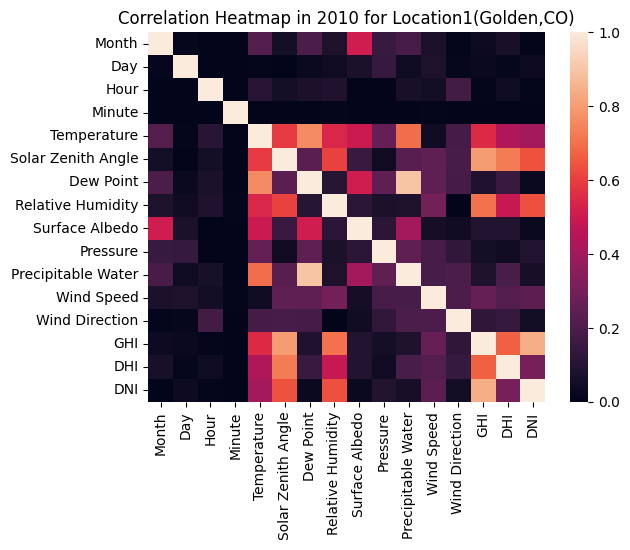

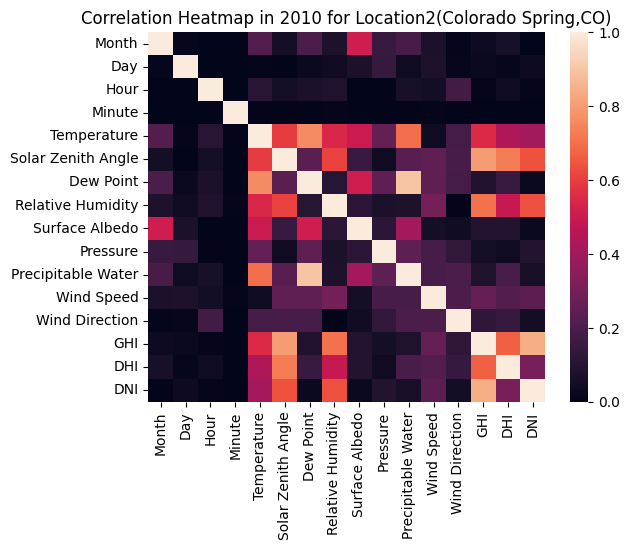

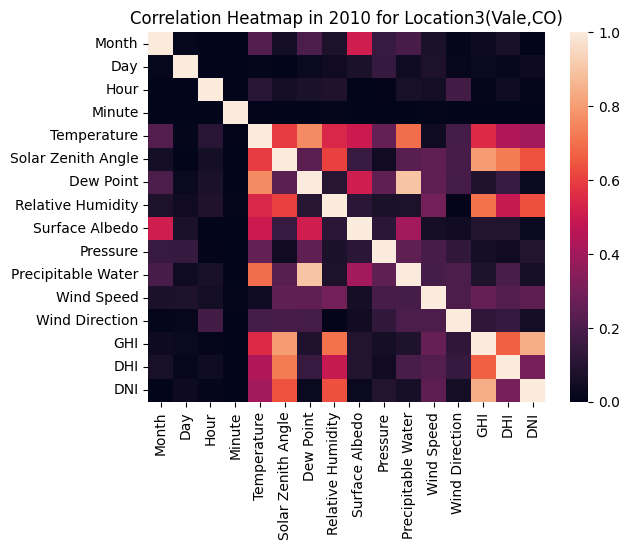

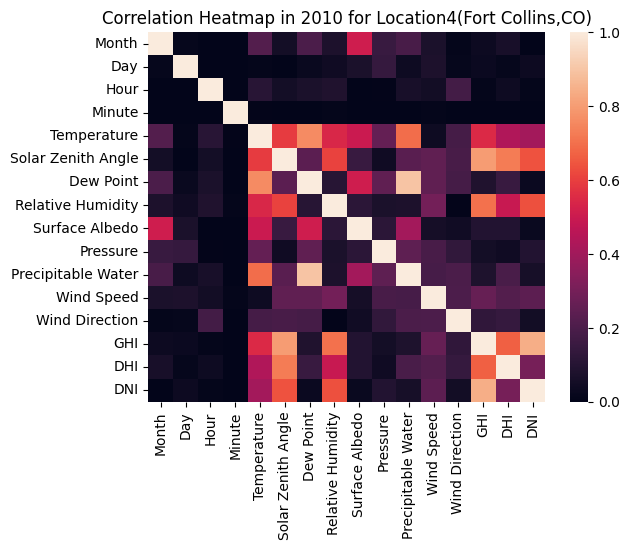

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(locs):
    plt.clf()
    corr_matrix = abs(dff.corr())
    heatmap = sns.heatmap(abs(corr_matrix))
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [7]:
for i in range(locs):
    dfs[i]['DNI after 0.5h'] = dfs[i][['DNI']].shift(1)
    dfs[i]['DNI after 1.0h'] = dfs[i][['DNI']].shift(2)
    dfs[i]['DNI after 1.5h'] = dfs[i][['DNI']].shift(3)
    dfs[i]['DNI after 2.0h'] = dfs[i][['DNI']].shift(4)
    dfs[i]['DNI after 2.5h'] = dfs[i][['DNI']].shift(5)
    dfs[i]['DNI after 3.0h'] = dfs[i][['DNI']].shift(6)
    dfs[i]['DNI after 3.5h'] = dfs[i][['DNI']].shift(7)
    dfs[i]['DNI after 4.0h'] = dfs[i][['DNI']].shift(8)
  
dfs[1].head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
sub_dfs = []
for i in range(locs):
    sub_dfs.append(dfs[i].iloc[:, 5:])

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


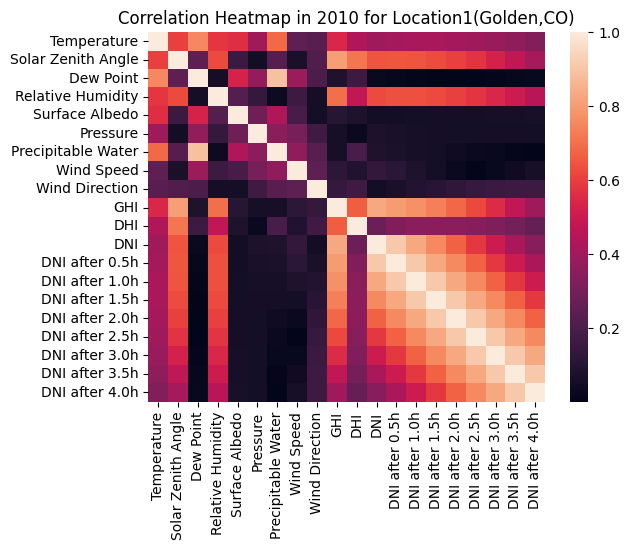

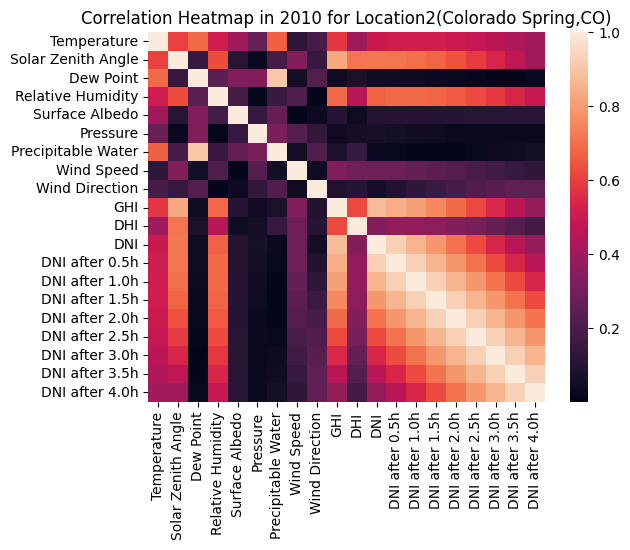

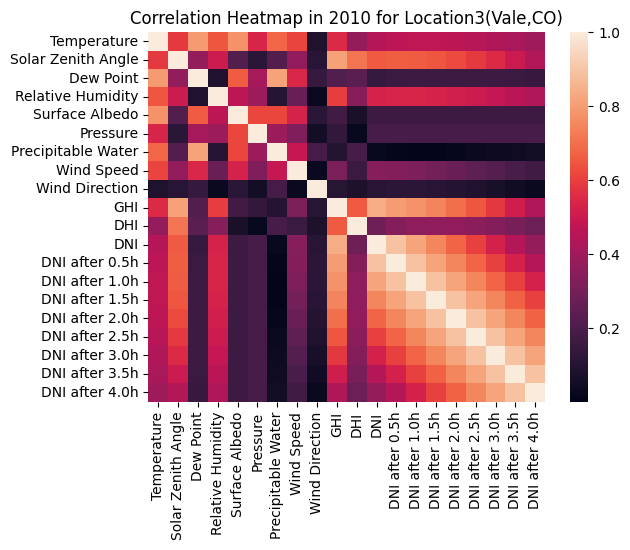

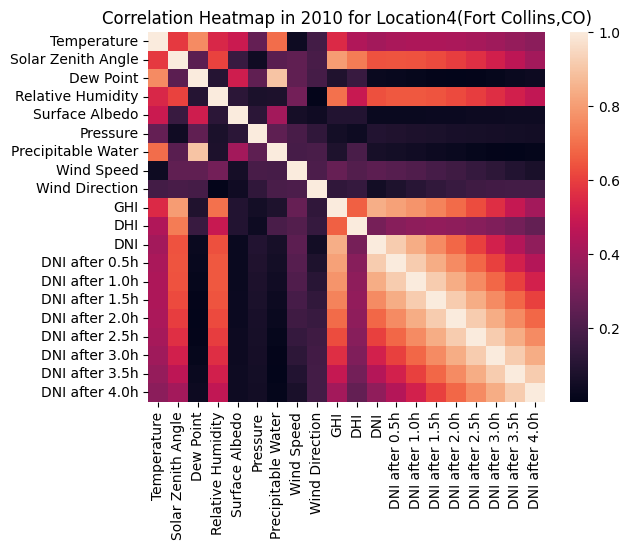

In [9]:
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr())
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [10]:
for i in range(locs):
    sub_dfs[i].drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,53.95,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,53.94,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,52.81,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,52.81,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,53.11,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


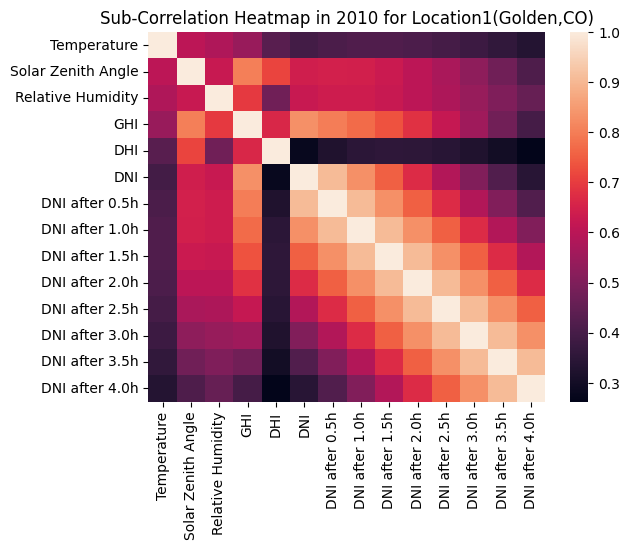

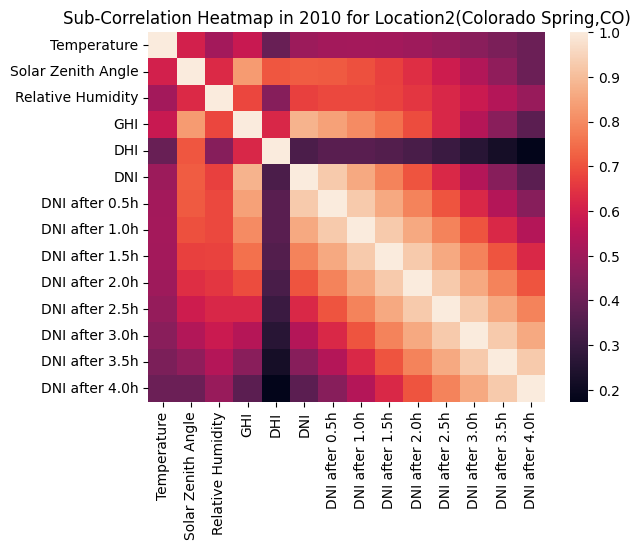

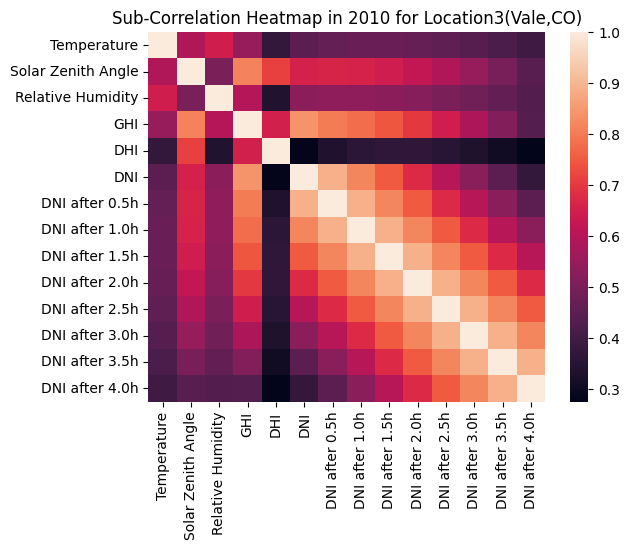

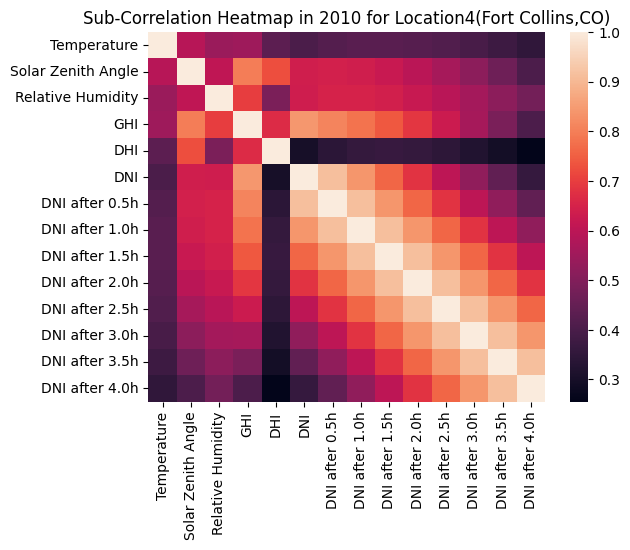

In [11]:
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr()) 
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Sub-Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [12]:
win_size = 8
X_lst = []
Y_lst = []
for i in range(locs):
    df_fetures = sub_dfs[i].iloc[:,:-8]
    X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))
    Y = np.zeros((df_fetures.shape[0] - win_size, 1))
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X.shape, Y.shape))

    for j in range(X.shape[0]):
        chunk_x = df_fetures.iloc[j:j+win_size, :].to_numpy()
        chunk_y = df_fetures.iloc[j+win_size, -1]
        X[j] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))
        Y[j]= chunk_y

    X_lst.append(X)
    Y_lst.append(Y)


Location1(Golden,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location2(Colorado Spring,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location3(Vale,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location4(Fort Collins,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)


In [13]:
# Remove the labels that we are sure they have DNI of 0

for i in range(locs):
    zero_index = []
    for j in range(31, 50):     ## 31 means 7pm, and 50 means 5:30 am
        zero_index = zero_index + list(range(j, Y_lst[i].shape[0], 48))
        ### examples:
        # zero1 = list(range(34, Y.shape[0], 48))    #10pm
        # # zero2 = list(range(35, Y.shape[0], 48))    #11pm

    print("{}\nnum of zero dni: ".format(text[i]), len(zero_index))
    print("This sum must be zeroo ==> ", np.sum(np.take(Y_lst[i], zero_index)))

    Y_lst[i] = np.delete(Y_lst[i], zero_index, axis=0)
    X_lst[i] = np.delete(X_lst[i], zero_index, axis=0)
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X_lst[i].shape, Y_lst[i].shape))


Location1(Golden,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location1(Golden,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location2(Colorado Spring,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location2(Colorado Spring,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location3(Vale,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location3(Vale,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location4(Fort Collins,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location4(Fort Collins,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.30

trainX_lst = []
valX_lst = []
testX_lst = []

trainY_lst = []
valY_lst = []
testY_lst = []

trainX_scaled_lst = []
valX_scaled_lst = []
testX_scaled_lst = []

for i in range(locs):
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)
    valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
    sc=StandardScaler()
    scaler = sc.fit(trainX)
    trainX_scaled = scaler.transform(trainX)
    valX_scaled = scaler.transform(valX)
    testX_scaled = scaler.transform(testX)

    trainX_lst.append(trainX)
    valX_lst.append(valX)
    testX_lst.append(testX)
    
    trainY_lst.append(trainY)
    valY_lst.append(valY)
    testY_lst.append(testY)
    
    trainX_scaled_lst.append(trainX_scaled)
    valX_scaled_lst.append(valX_scaled)
    testX_scaled_lst.append(testX_scaled)
    
    print("=== {} ===".format(text[i]))
    print("trainx size: ", trainX_scaled.shape)
    print("valx size: ", valX_scaled.shape)
    print("testx size: ", testX_scaled.shape)
    print("==============")
    print("trainy size: ", trainY.shape)
    print("valy size: ", valY.shape)
    print("testy size: ", testY.shape)
    print("==============\n\n")

=== Location1(Golden,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location2(Colorado Spring,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location3(Vale,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location4(Fort Collins,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)




In [15]:
# let's try linear regression first
from sklearn import linear_model, metrics

y_pred_linreg_lst = []

for i in range(locs): 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(trainX_scaled_lst[i], trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_linreg = regr.predict(testX_scaled_lst[i])
    y_pred_linreg_lst.append(y_pred_linreg)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=======\n")


=== Location1(Golden,CO) ===
Mean Absolute Error: 73.34473329470414
Mean Squared Error: 16084.807167683895
Root Mean Squared Error: 126.82589312787786

=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 72.14272926896014
Mean Squared Error: 16585.825650263017
Root Mean Squared Error: 128.78596837490883

=== Location3(Vale,CO) ===
Mean Absolute Error: 74.77877941779302
Mean Squared Error: 18345.51376827677
Root Mean Squared Error: 135.44561184577657

=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 71.0022581851658
Mean Squared Error: 15363.610426898877
Root Mean Squared Error: 123.95003197619143



In [16]:
from sklearn.svm import SVR

y_pred_svr_lst = []

for i in range(locs):
    regressor = SVR(kernel='poly')
    regressor.fit(trainX_scaled_lst[i],trainY_lst[i])
    y_pred_svr = regressor.predict(testX_scaled_lst[i])
    y_pred_svr_lst.append(y_pred_svr)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=======\n")



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location1(Golden,CO) ===
Mean Absolute Error: 137.0725072531945
Mean Squared Error: 63612.95696838486
Root Mean Squared Error: 252.2160918109407



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 139.30089271162822
Mean Squared Error: 66120.81064504826
Root Mean Squared Error: 257.1396714726226



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location3(Vale,CO) ===
Mean Absolute Error: 139.33389426512267
Mean Squared Error: 65145.92071530215
Root Mean Squared Error: 255.23698931640405



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 134.45680027368985
Mean Squared Error: 62455.57888845252
Root Mean Squared Error: 249.91114198541152



In [17]:
input_shape = trainX_lst[0].shape[1]
n_batch_size = 200

n_steps_per_epoch = int(trainX_lst[0].shape[0] / n_batch_size)
n_validation_steps = int(valX_lst[0].shape[0] / n_batch_size)
n_test_steps = int(testX_lst[0].shape[0] / n_batch_size)
n_epochs = 150


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:200
Steps per Epoch:61
Validation Steps:8
Test Steps:17
Number of Epochs:150


In [18]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3136      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
history_lst = []
checkpoint_no_lst = []
model_name_lst = []
for i in range(locs):
    # Prepare a directory to store all the checkpoints.
    checkpoint_no = 'ckpt_{}_ANN'.format(i+1)
    model_name = 'dnl_forcast_ANN{}'.format(i+1)
    checkpoint_no_lst.append(checkpoint_no)
    model_name_lst.append(model_name)
    checkpoint_dir = './'+ checkpoint_no
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
    history = model.fit(trainX_scaled_lst[i],
                    trainY_lst[i],
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled_lst[i], valY_lst[i]),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])


    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')

    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]

    pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

    
    history_lst.append(history)

Epoch 1/150
 1/61 [..............................] - ETA: 12s - loss: 211375.8750 - mae: 280.9552INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 161752.5469 - mae: 225.6556 - val_loss: 134862.0000 - val_mae: 207.1245
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 131446.4375 - mae: 215.3946INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 111812.0156 - mae: 197.3926 - val_loss: 84896.2266 - val_mae: 176.5449
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 107038.8828 - mae: 208.1562INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 72705.0859 - mae: 169.2926 - val_loss: 55280.2344 - val_mae: 148.9846
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 71431.2266 - mae: 175.0581INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 45936.6562 - mae: 138.3006 - val_loss: 33911.5234 - val_mae: 121.8468
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 38777.4609 - mae: 129.3046INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 31348.7734 - mae: 114.5950 - val_loss: 26965.2969 - val_mae: 109.0801
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 34027.1289 - mae: 113.4723INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 26911.4355 - mae: 104.7699 - val_loss: 24261.6543 - val_mae: 100.9925
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 39617.5391 - mae: 127.8607INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 25140.7207 - mae: 100.2056 - val_loss: 22693.9824 - val_mae: 97.1792
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 26506.4883 - mae: 100.0437INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 23180.2441 - mae: 94.4769 - val_loss: 21152.2148 - val_mae: 93.0137
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 29830.0156 - mae: 110.2250INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 22217.3887 - mae: 92.3700 - val_loss: 20138.6172 - val_mae: 89.6989
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 22508.3027 - mae: 90.8166INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 20552.0977 - mae: 86.8975 - val_loss: 18987.3926 - val_mae: 84.8618
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 23736.8359 - mae: 92.2313INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 19653.5195 - mae: 83.9177 - val_loss: 18193.2031 - val_mae: 81.2219
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 27942.2246 - mae: 91.8730INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 19704.5020 - mae: 82.2572 - val_loss: 17725.6016 - val_mae: 80.8650
Epoch 13/150
61/61 [==============================] - 0s 886us/step - loss: 19022.5703 - mae: 79.8426 - val_loss: 17880.4316 - val_mae: 82.0385
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 20099.3750 - mae: 83.8959INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 18844.9766 - mae: 78.6439 - val_loss: 16909.9121 - val_mae: 76.0717
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 22868.0918 - mae: 82.3929INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 18078.6641 - mae: 75.3980 - val_loss: 16335.5947 - val_mae: 72.8138
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 23243.6445 - mae: 78.6156INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 18106.0918 - mae: 74.7160 - val_loss: 16067.8936 - val_mae: 72.5413
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 12385.3096 - mae: 62.9888INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16880.0391 - mae: 71.8729 - val_loss: 15920.7285 - val_mae: 70.0548
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 15391.5664 - mae: 64.8242INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 17608.3477 - mae: 71.8560 - val_loss: 15695.7090 - val_mae: 70.0155
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 13717.5928 - mae: 63.2033INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 17543.3750 - mae: 71.7714 - val_loss: 15456.5361 - val_mae: 67.5582
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 9462.9375 - mae: 52.8250INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16062.6494 - mae: 68.4696 - val_loss: 15418.3076 - val_mae: 67.7889
Epoch 21/150
61/61 [==============================] - 0s 896us/step - loss: 17976.2461 - mae: 71.6077 - val_loss: 15434.4150 - val_mae: 68.8307
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 20664.0176 - mae: 71.4651INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16593.0371 - mae: 68.3708 - val_loss: 15254.1074 - val_mae: 67.7452
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 13292.9727 - mae: 61.1319INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16972.3926 - mae: 69.1733 - val_loss: 15183.8135 - val_mae: 65.9730
Epoch 24/150
61/61 [==============================] - 0s 776us/step - loss: 17152.6816 - mae: 68.6578 - val_loss: 15689.3555 - val_mae: 70.1603
Epoch 25/150
61/61 [==============================] - 0s 829us/step - loss: 16201.0537 - mae: 67.0909 - val_loss: 15275.4277 - val_mae: 68.5128
Epoch 26/150
61/61 [==============================] - 0s 805us/step - loss: 16293.1484 - mae: 66.6235 - val_loss: 15498.6934 - val_mae: 70.0106
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 20276.7930 - mae: 76.4475INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16932.3066 - mae: 67.9748 - val_loss: 14865.8525 - val_mae: 64.1605
Epoch 28/150
61/61 [==============================] - 0s 801us/step - loss: 16027.2656 - mae: 65.8851 - val_loss: 14984.7646 - val_mae: 64.1584
Epoch 29/150
61/61 [==============================] - 0s 814us/step - loss: 16610.4434 - mae: 66.7562 - val_loss: 14897.9502 - val_mae: 64.6920
Epoch 30/150
61/61 [==============================] - 0s 810us/step - loss: 15912.1318 - mae: 65.1331 - val_loss: 15196.0684 - val_mae: 65.8456
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 14392.1826 - mae: 61.8639INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16859.2949 - mae: 66.4622 - val_loss: 14739.6797 - val_mae: 62.1133
Epoch 32/150
61/61 [==============================] - 0s 772us/step - loss: 16072.0400 - mae: 65.3887 - val_loss: 14816.4502 - val_mae: 61.4703
Epoch 33/150
61/61 [==============================] - 0s 809us/step - loss: 15935.4736 - mae: 64.5667 - val_loss: 14788.3838 - val_mae: 62.5097
Epoch 34/150
61/61 [==============================] - 0s 813us/step - loss: 16506.9238 - mae: 66.2160 - val_loss: 14892.7979 - val_mae: 64.6581
Epoch 35/150
61/61 [==============================] - 0s 800us/step - loss: 15652.9512 - mae: 63.9572 - val_loss: 14765.4141 - val_mae: 63.3529
Epoch 36/150
61/61 [==============================] - 0s 829us/step - loss: 16556.7090 - mae: 65.4351 - val_loss: 15292.9287 - val_mae: 68.7580
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 16132.0684 - mae: 74.5090INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forc

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16344.2695 - mae: 65.6795 - val_loss: 14715.4873 - val_mae: 61.3437
Epoch 38/150
61/61 [==============================] - 0s 805us/step - loss: 16351.9307 - mae: 65.5297 - val_loss: 14776.4990 - val_mae: 62.4523
Epoch 39/150
61/61 [==============================] - 0s 883us/step - loss: 15474.6064 - mae: 62.9319 - val_loss: 14736.8936 - val_mae: 63.0062
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 17616.5020 - mae: 66.8096INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16429.5742 - mae: 65.7329 - val_loss: 14657.7051 - val_mae: 62.3428
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 9667.1338 - mae: 54.2747INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 15419.0215 - mae: 63.1349 - val_loss: 14626.0898 - val_mae: 62.6332
Epoch 42/150
61/61 [==============================] - 0s 813us/step - loss: 16091.0947 - mae: 64.8473 - val_loss: 14715.2275 - val_mae: 63.1508
Epoch 43/150
61/61 [==============================] - 0s 870us/step - loss: 15942.4980 - mae: 64.4251 - val_loss: 14708.9473 - val_mae: 63.4909
Epoch 44/150
61/61 [==============================] - 0s 979us/step - loss: 15957.9102 - mae: 64.1743 - val_loss: 14677.3408 - val_mae: 63.0248
Epoch 45/150
61/61 [==============================] - 0s 834us/step - loss: 16008.5215 - mae: 64.0272 - val_loss: 14819.6611 - val_mae: 65.3557
Epoch 46/150
61/61 [==============================] - 0s 817us/step - loss: 15909.4111 - mae: 64.2324 - val_loss: 15078.7275 - val_mae: 66.2898
Epoch 47/150
61/61 [==============================] - 0s 857us/step - loss: 15954.3643 - mae: 64.5073 - val_loss: 14705.9766 - val_mae: 64.2665
Epoch 4

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16427.0156 - mae: 64.6806 - val_loss: 14620.1221 - val_mae: 61.2501
Epoch 50/150
61/61 [==============================] - 0s 787us/step - loss: 15538.1338 - mae: 62.7298 - val_loss: 14707.6436 - val_mae: 62.9810
Epoch 51/150
61/61 [==============================] - 0s 800us/step - loss: 15936.9248 - mae: 64.7052 - val_loss: 14650.4014 - val_mae: 61.2517
Epoch 52/150
61/61 [==============================] - 0s 793us/step - loss: 15708.7900 - mae: 63.4798 - val_loss: 14737.6973 - val_mae: 63.8506
Epoch 53/150
 1/61 [..............................] - ETA: 0s - loss: 16069.3252 - mae: 67.2059INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 15940.4639 - mae: 64.1693 - val_loss: 14539.7734 - val_mae: 61.8748
Epoch 54/150
61/61 [==============================] - 0s 773us/step - loss: 15415.4424 - mae: 62.9094 - val_loss: 14559.5186 - val_mae: 63.2470
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 13539.0850 - mae: 58.5076INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 15721.5459 - mae: 63.3257 - val_loss: 14481.6592 - val_mae: 60.1831
Epoch 56/150
61/61 [==============================] - 0s 737us/step - loss: 15816.2998 - mae: 63.6157 - val_loss: 14545.3447 - val_mae: 61.0162
Epoch 57/150
61/61 [==============================] - 0s 788us/step - loss: 16085.6738 - mae: 64.3439 - val_loss: 14585.0986 - val_mae: 63.3573
Epoch 58/150
61/61 [==============================] - 0s 794us/step - loss: 15477.2549 - mae: 63.0898 - val_loss: 14950.8887 - val_mae: 65.8743
Epoch 59/150
61/61 [==============================] - 0s 787us/step - loss: 15628.6055 - mae: 63.1383 - val_loss: 14636.5723 - val_mae: 63.6181
Epoch 60/150
 1/61 [..............................] - ETA: 0s - loss: 15983.9102 - mae: 64.8273INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 15846.8691 - mae: 63.8730 - val_loss: 14407.8467 - val_mae: 61.5036
Epoch 61/150
61/61 [==============================] - 0s 743us/step - loss: 15323.1914 - mae: 62.7115 - val_loss: 14605.8828 - val_mae: 62.4702
Epoch 62/150
61/61 [==============================] - 0s 798us/step - loss: 15578.5137 - mae: 63.0099 - val_loss: 14674.5654 - val_mae: 64.3249
Epoch 63/150
61/61 [==============================] - 0s 822us/step - loss: 15555.0137 - mae: 63.2277 - val_loss: 14694.8047 - val_mae: 63.1701
Epoch 64/150
61/61 [==============================] - 0s 849us/step - loss: 15492.9756 - mae: 63.0656 - val_loss: 14537.7812 - val_mae: 61.5232
Epoch 65/150
61/61 [==============================] - 0s 893us/step - loss: 15631.5723 - mae: 63.2727 - val_loss: 14600.2666 - val_mae: 62.5394
Epoch 66/150
61/61 [==============================] - 0s 908us/step - loss: 15402.2383 - mae: 63.0681 - val_loss: 14589.2246 - val_mae: 62.4480
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 15546.3584 - mae: 63.2534 - val_loss: 14306.9326 - val_mae: 60.7453
Epoch 71/150
61/61 [==============================] - 0s 743us/step - loss: 15476.9854 - mae: 62.7337 - val_loss: 14698.2734 - val_mae: 63.3822
Epoch 72/150
61/61 [==============================] - 0s 786us/step - loss: 15231.7363 - mae: 62.6698 - val_loss: 14437.8711 - val_mae: 60.7433
Epoch 73/150
61/61 [==============================] - 0s 799us/step - loss: 15186.0947 - mae: 62.0601 - val_loss: 14391.9229 - val_mae: 62.5630
Epoch 74/150
61/61 [==============================] - 0s 812us/step - loss: 15723.8008 - mae: 64.0093 - val_loss: 14485.7305 - val_mae: 62.8300
Epoch 75/150
61/61 [==============================] - 0s 854us/step - loss: 15586.6641 - mae: 63.1013 - val_loss: 14398.8809 - val_mae: 60.3529
Epoch 76/150
61/61 [==============================] - 0s 2ms/step - loss: 14859.0264 - mae: 61.5298 - val_loss: 14413.1240 - val_mae: 60.0805
Epoch 77/

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14665.7617 - mae: 61.2242 - val_loss: 14269.5439 - val_mae: 59.7696
Epoch 97/150
61/61 [==============================] - 0s 741us/step - loss: 15261.7266 - mae: 62.9504 - val_loss: 14458.1377 - val_mae: 64.2490
Epoch 98/150
61/61 [==============================] - 0s 785us/step - loss: 15200.9912 - mae: 62.7545 - val_loss: 14851.6953 - val_mae: 66.5780
Epoch 99/150
61/61 [==============================] - 0s 787us/step - loss: 15464.7031 - mae: 62.9360 - val_loss: 14472.7627 - val_mae: 62.9138
Epoch 100/150
61/61 [==============================] - 0s 806us/step - loss: 14983.0195 - mae: 62.2472 - val_loss: 14865.9941 - val_mae: 65.2721
Epoch 101/150
61/61 [==============================] - 0s 821us/step - loss: 14589.1367 - mae: 61.7818 - val_loss: 14291.9209 - val_mae: 60.3342
Epoch 102/150
61/61 [==============================] - 0s 771us/step - loss: 14819.6143 - mae: 61.5613 - val_loss: 14342.1367 - val_mae: 62.5559
Epoc

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 15804.7158 - mae: 63.6863 - val_loss: 14218.9854 - val_mae: 62.2676
Epoch 104/150
61/61 [==============================] - 0s 751us/step - loss: 14388.0381 - mae: 61.1349 - val_loss: 14300.6504 - val_mae: 60.9824
Epoch 105/150
61/61 [==============================] - 0s 776us/step - loss: 15291.6660 - mae: 62.6478 - val_loss: 14559.5039 - val_mae: 63.5175
Epoch 106/150
61/61 [==============================] - 0s 824us/step - loss: 14403.2324 - mae: 61.3182 - val_loss: 14260.8838 - val_mae: 60.4798
Epoch 107/150
61/61 [==============================] - 0s 864us/step - loss: 15477.2637 - mae: 63.0299 - val_loss: 14394.5303 - val_mae: 62.5352
Epoch 108/150
61/61 [==============================] - 0s 891us/step - loss: 15141.7695 - mae: 62.2079 - val_loss: 14350.9678 - val_mae: 61.0528
Epoch 109/150
61/61 [==============================] - 0s 881us/step - loss: 14774.6465 - mae: 62.0946 - val_loss: 14434.1562 - val_mae: 62.2565
E

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14763.0654 - mae: 61.6152 - val_loss: 14203.3750 - val_mae: 61.6882
Epoch 115/150
61/61 [==============================] - 0s 840us/step - loss: 15126.8965 - mae: 62.5746 - val_loss: 14461.4824 - val_mae: 63.4522
Epoch 116/150
61/61 [==============================] - 0s 774us/step - loss: 14426.1191 - mae: 61.4492 - val_loss: 14332.0371 - val_mae: 61.1553
Epoch 117/150
61/61 [==============================] - 0s 770us/step - loss: 14688.9512 - mae: 61.5608 - val_loss: 14349.8467 - val_mae: 61.7066
Epoch 118/150
61/61 [==============================] - 0s 786us/step - loss: 15201.7041 - mae: 62.4890 - val_loss: 14614.1885 - val_mae: 64.1987
Epoch 119/150
61/61 [==============================] - 0s 796us/step - loss: 14855.5049 - mae: 62.0798 - val_loss: 14256.2002 - val_mae: 61.3453
Epoch 120/150
61/61 [==============================] - 0s 785us/step - loss: 14762.3115 - mae: 61.5738 - val_loss: 14212.1162 - val_mae: 60.5198
E

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14639.4678 - mae: 61.5579 - val_loss: 14156.7461 - val_mae: 61.3770
Epoch 140/150
61/61 [==============================] - 0s 800us/step - loss: 14398.4736 - mae: 61.9445 - val_loss: 14260.3027 - val_mae: 61.0769
Epoch 141/150
61/61 [==============================] - 0s 829us/step - loss: 14846.7363 - mae: 62.0295 - val_loss: 14331.6016 - val_mae: 61.6710
Epoch 142/150
61/61 [==============================] - 0s 844us/step - loss: 14640.3213 - mae: 61.8195 - val_loss: 14397.1221 - val_mae: 62.9001
Epoch 143/150
61/61 [==============================] - 0s 849us/step - loss: 14793.6396 - mae: 62.0265 - val_loss: 14200.5195 - val_mae: 61.0709
Epoch 144/150
61/61 [==============================] - 0s 859us/step - loss: 14673.9209 - mae: 61.5914 - val_loss: 15034.8037 - val_mae: 68.9491
Epoch 145/150
61/61 [==============================] - 0s 809us/step - loss: 14443.5254 - mae: 61.4182 - val_loss: 14492.5371 - val_mae: 63.6780
E

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14202.3701 - mae: 61.5602 - val_loss: 16245.8027 - val_mae: 65.1679
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 19877.4180 - mae: 76.8431INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14256.6426 - mae: 61.5537 - val_loss: 16020.5586 - val_mae: 63.8980
Epoch 3/150
61/61 [==============================] - 0s 724us/step - loss: 14298.0117 - mae: 61.5271 - val_loss: 16136.8271 - val_mae: 65.4421
Epoch 4/150
61/61 [==============================] - 0s 756us/step - loss: 14050.5107 - mae: 61.0387 - val_loss: 16170.8662 - val_mae: 64.5366
Epoch 5/150
61/61 [==============================] - 0s 764us/step - loss: 14041.6982 - mae: 60.9812 - val_loss: 16085.6123 - val_mae: 62.5794
Epoch 6/150
61/61 [==============================] - 0s 754us/step - loss: 14401.7529 - mae: 62.4753 - val_loss: 16252.1250 - val_mae: 63.3647
Epoch 7/150
61/61 [==============================] - 0s 827us/step - loss: 14051.7549 - mae: 61.1811 - val_loss: 16310.7529 - val_mae: 64.4947
Epoch 8/150
61/61 [==============================] - 0s 784us/step - loss: 13753.8389 - mae: 60.7241 - val_loss: 16326.9121 - val_mae: 64.8748
Epoch 9/150
6

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14482.7158 - mae: 62.2970 - val_loss: 15994.7451 - val_mae: 62.9782
Epoch 21/150
61/61 [==============================] - 0s 723us/step - loss: 13974.0918 - mae: 60.6963 - val_loss: 16087.4248 - val_mae: 62.6989
Epoch 22/150
61/61 [==============================] - 0s 789us/step - loss: 13994.1904 - mae: 60.6623 - val_loss: 16251.8271 - val_mae: 63.3869
Epoch 23/150
61/61 [==============================] - 0s 829us/step - loss: 13343.3379 - mae: 59.5843 - val_loss: 16104.6680 - val_mae: 62.3529
Epoch 24/150
61/61 [==============================] - 0s 769us/step - loss: 13893.0479 - mae: 60.6888 - val_loss: 16127.8945 - val_mae: 63.0934
Epoch 25/150
61/61 [==============================] - 0s 780us/step - loss: 13985.1387 - mae: 61.4973 - val_loss: 16259.1660 - val_mae: 62.9671
Epoch 26/150
61/61 [==============================] - 0s 769us/step - loss: 14065.4785 - mae: 60.7280 - val_loss: 16193.9023 - val_mae: 62.6658
Epoch 2

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13450.7949 - mae: 59.1239 - val_loss: 15969.8887 - val_mae: 63.0478
Epoch 61/150
61/61 [==============================] - 0s 755us/step - loss: 13490.5488 - mae: 59.6261 - val_loss: 16287.6650 - val_mae: 65.4454
Epoch 62/150
61/61 [==============================] - 0s 763us/step - loss: 13579.6611 - mae: 59.9577 - val_loss: 16152.4316 - val_mae: 62.7823
Epoch 63/150
61/61 [==============================] - 0s 762us/step - loss: 13503.7656 - mae: 59.8455 - val_loss: 16327.0566 - val_mae: 64.9719
Epoch 64/150
 1/61 [..............................] - ETA: 0s - loss: 6352.3545 - mae: 44.7452INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13487.9014 - mae: 59.3442 - val_loss: 15954.1299 - val_mae: 63.0525
Epoch 65/150
 1/61 [..............................] - ETA: 0s - loss: 10494.7109 - mae: 55.8437INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13573.9424 - mae: 60.0557 - val_loss: 15935.8291 - val_mae: 62.8198
Epoch 66/150
61/61 [==============================] - 0s 820us/step - loss: 13398.6514 - mae: 59.6070 - val_loss: 16195.3945 - val_mae: 64.3415
Epoch 67/150
61/61 [==============================] - 0s 1ms/step - loss: 13121.6963 - mae: 58.9542 - val_loss: 16078.6553 - val_mae: 61.7030
Epoch 68/150
61/61 [==============================] - 0s 938us/step - loss: 13691.1504 - mae: 60.1103 - val_loss: 15958.7305 - val_mae: 63.0062
Epoch 69/150
61/61 [==============================] - 0s 765us/step - loss: 13583.6035 - mae: 60.0960 - val_loss: 16316.7559 - val_mae: 64.7064
Epoch 70/150
61/61 [==============================] - 0s 752us/step - loss: 13361.6816 - mae: 59.3368 - val_loss: 16103.3936 - val_mae: 62.5198
Epoch 71/150
61/61 [==============================] - 0s 765us/step - loss: 13494.7324 - mae: 59.7898 - val_loss: 16052.3125 - val_mae: 62.1681
Epoch 72/

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13408.4111 - mae: 59.6136 - val_loss: 15892.6250 - val_mae: 62.2958
Epoch 105/150
61/61 [==============================] - 0s 759us/step - loss: 13190.2900 - mae: 59.2793 - val_loss: 16050.3115 - val_mae: 63.5526
Epoch 106/150
61/61 [==============================] - 0s 773us/step - loss: 13123.4141 - mae: 59.1583 - val_loss: 16083.0752 - val_mae: 64.5389
Epoch 107/150
61/61 [==============================] - 0s 765us/step - loss: 13072.7070 - mae: 58.4390 - val_loss: 16036.0635 - val_mae: 63.0189
Epoch 108/150
61/61 [==============================] - 0s 762us/step - loss: 13040.6396 - mae: 58.6148 - val_loss: 16485.4180 - val_mae: 66.5508
Epoch 109/150
 1/61 [..............................] - ETA: 0s - loss: 10708.4180 - mae: 52.2779INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14024.0928 - mae: 61.0684 - val_loss: 15864.4004 - val_mae: 64.1012
Epoch 110/150
61/61 [==============================] - 0s 742us/step - loss: 12534.6836 - mae: 58.0889 - val_loss: 16264.7930 - val_mae: 64.0661
Epoch 111/150
61/61 [==============================] - 0s 762us/step - loss: 12896.3252 - mae: 58.2825 - val_loss: 15971.0000 - val_mae: 62.9155
Epoch 112/150
61/61 [==============================] - 0s 758us/step - loss: 13215.1533 - mae: 59.7105 - val_loss: 16433.0059 - val_mae: 66.4919
Epoch 113/150
61/61 [==============================] - 0s 854us/step - loss: 13156.6562 - mae: 59.0648 - val_loss: 15968.3184 - val_mae: 62.3734
Epoch 114/150
61/61 [==============================] - 0s 782us/step - loss: 13107.6035 - mae: 58.4051 - val_loss: 16156.8428 - val_mae: 64.9257
Epoch 115/150
61/61 [==============================] - 0s 763us/step - loss: 13142.5273 - mae: 58.9442 - val_loss: 15954.7930 - val_mae: 62.5611
E

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13221.8545 - mae: 59.2155 - val_loss: 14108.8154 - val_mae: 60.6298
Epoch 2/150
61/61 [==============================] - 0s 767us/step - loss: 13128.3691 - mae: 58.4257 - val_loss: 14176.7275 - val_mae: 62.5614
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 10982.3633 - mae: 60.1798INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 13001.2549 - mae: 58.8255 - val_loss: 14040.9961 - val_mae: 58.7785
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 22748.4121 - mae: 78.8446INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13235.6543 - mae: 58.8291 - val_loss: 13952.1924 - val_mae: 57.9104
Epoch 5/150
61/61 [==============================] - 0s 730us/step - loss: 13321.3252 - mae: 58.9810 - val_loss: 14156.9375 - val_mae: 60.5499
Epoch 6/150
61/61 [==============================] - 0s 757us/step - loss: 12703.4268 - mae: 57.7251 - val_loss: 14180.8389 - val_mae: 58.3731
Epoch 7/150
61/61 [==============================] - 0s 762us/step - loss: 13314.4346 - mae: 58.8659 - val_loss: 14053.2324 - val_mae: 58.9412
Epoch 8/150
61/61 [==============================] - 0s 760us/step - loss: 12886.4541 - mae: 58.3935 - val_loss: 14042.2383 - val_mae: 60.3076
Epoch 9/150
61/61 [==============================] - 0s 755us/step - loss: 13093.0918 - mae: 58.4972 - val_loss: 14115.9502 - val_mae: 59.8613
Epoch 10/150
61/61 [==============================] - 0s 759us/step - loss: 12935.8105 - mae: 58.1448 - val_loss: 14299.9736 - val_mae: 58.4164
Epoch 11/150

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 13206.3975 - mae: 58.6826 - val_loss: 12411.0127 - val_mae: 57.0650
Epoch 2/150
61/61 [==============================] - 0s 842us/step - loss: 13207.2852 - mae: 58.6225 - val_loss: 12582.1348 - val_mae: 58.0259
Epoch 3/150
61/61 [==============================] - 0s 835us/step - loss: 13333.9482 - mae: 58.7029 - val_loss: 12754.7539 - val_mae: 57.6077
Epoch 4/150
61/61 [==============================] - 0s 821us/step - loss: 13261.6553 - mae: 58.6446 - val_loss: 12701.4053 - val_mae: 57.7760
Epoch 5/150
61/61 [==============================] - 0s 842us/step - loss: 13040.2842 - mae: 58.1903 - val_loss: 12793.4814 - val_mae: 57.3060
Epoch 6/150
61/61 [==============================] - 0s 777us/step - loss: 13135.1260 - mae: 58.6475 - val_loss: 13035.5039 - val_mae: 62.3843
Epoch 7/150
61/61 [==============================] - 0s 764us/step - loss: 12858.2529 - mae: 58.1533 - val_loss: 12767.4150 - val_mae: 55.7576
Epoch 8/150
6

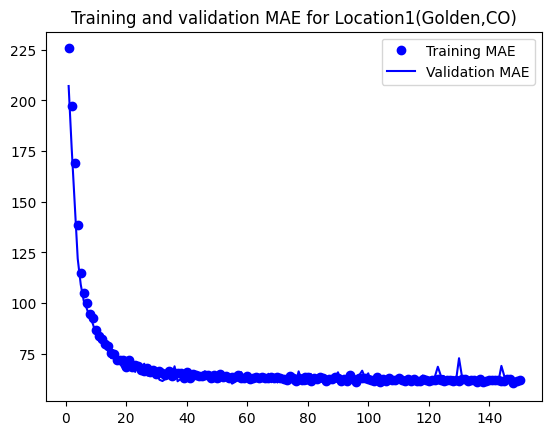

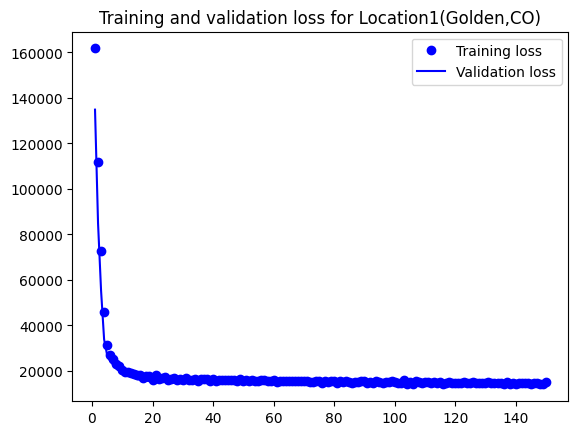

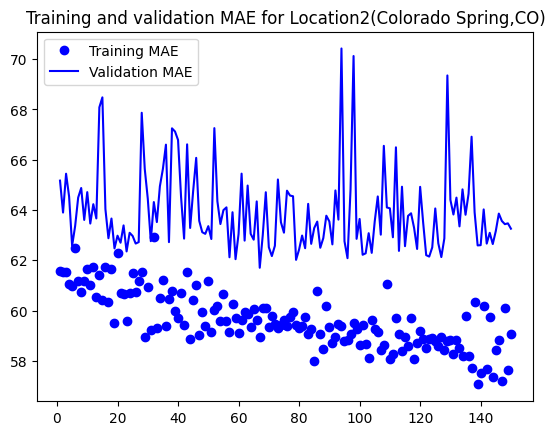

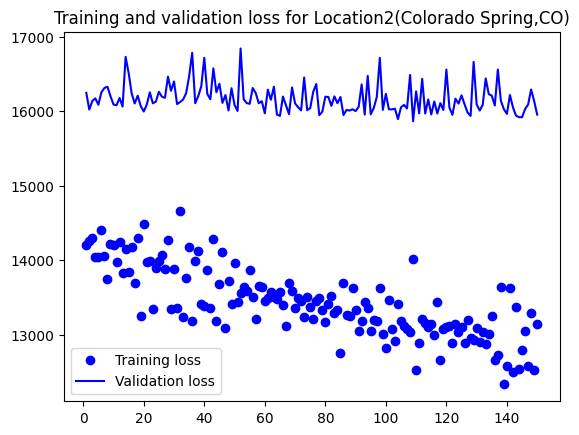

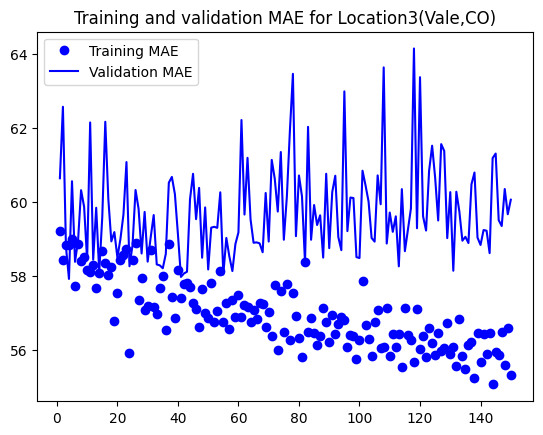

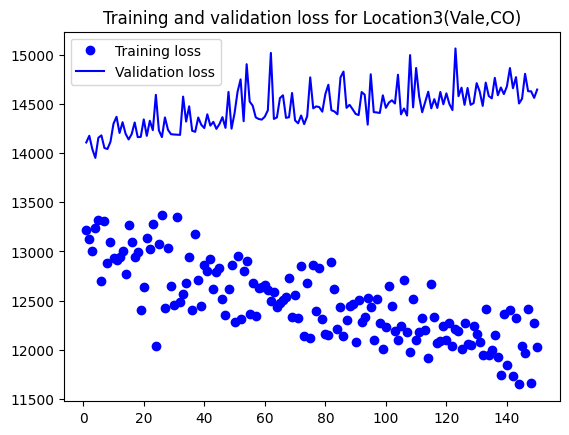

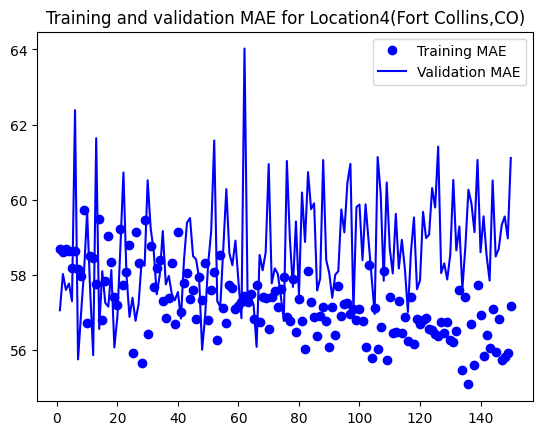

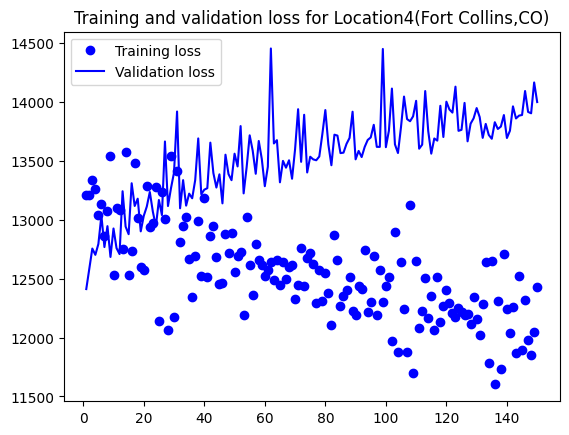

In [20]:
for i in range(locs):
    mae = history_lst[i].history['mae']
    val_mae = history_lst[i].history['val_mae']
    loss = history_lst[i].history['loss']
    val_loss = history_lst[i].history['val_loss']
    
    epochs = range(1, len(mae) + 1)
    plt.clf()
    plt.plot(epochs, mae, 'bo', label='Training MAE')
    plt.plot(epochs, val_mae, 'b', label='Validation MAE')
    plt.title('Training and validation MAE for {}'.format(text[i]))
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss for {}'.format(text[i]))
    plt.legend()
    
    plt.show()

In [21]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [22]:
k = 5
all_scores_lst = []
num_val_samples = len(trainX_lst[0]) // k
for i in range(locs):
    all_scores = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]

        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        print('MAE: ' + str(val_mae))
        print('========================')
    all_scores_lst.append(all_scores)


Processing Fold 0
MAE: 77.55302429199219
Processing Fold 1
MAE: 66.95771789550781
Processing Fold 2
MAE: 70.17906951904297
Processing Fold 3
MAE: 58.357967376708984
Processing Fold 4
MAE: 58.48003387451172
Processing Fold 0
MAE: 62.16015625
Processing Fold 1
MAE: 57.67634963989258
Processing Fold 2
MAE: 61.722862243652344
Processing Fold 3
MAE: 66.51497650146484
Processing Fold 4
MAE: 60.30390167236328
Processing Fold 0
MAE: 58.91573715209961
Processing Fold 1
MAE: 71.96003723144531
Processing Fold 2
MAE: 62.82291793823242
Processing Fold 3
MAE: 59.574745178222656
Processing Fold 4
MAE: 81.5697250366211
Processing Fold 0
MAE: 61.37556076049805
Processing Fold 1
MAE: 60.81532287597656
Processing Fold 2
MAE: 64.04437255859375
Processing Fold 3
MAE: 69.3835220336914
Processing Fold 4
MAE: 63.45602035522461


In [23]:
for i in range(locs):
    for j, val in enumerate(all_scores_lst[i]):
        print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds {}: '.format(text[i]) + str(np.mean(all_scores[i])))
    print("================")

Fold 0: MAE of 77.55302429199219
Fold 1: MAE of 66.95771789550781
Fold 2: MAE of 70.17906951904297
Fold 3: MAE of 58.357967376708984
Fold 4: MAE of 58.48003387451172
Mean MAE of all folds Location1(Golden,CO): 61.37556076049805
Fold 0: MAE of 62.16015625
Fold 1: MAE of 57.67634963989258
Fold 2: MAE of 61.722862243652344
Fold 3: MAE of 66.51497650146484
Fold 4: MAE of 60.30390167236328
Mean MAE of all folds Location2(Colorado Spring,CO): 60.81532287597656
Fold 0: MAE of 58.91573715209961
Fold 1: MAE of 71.96003723144531
Fold 2: MAE of 62.82291793823242
Fold 3: MAE of 59.574745178222656
Fold 4: MAE of 81.5697250366211
Mean MAE of all folds Location3(Vale,CO): 64.04437255859375
Fold 0: MAE of 61.37556076049805
Fold 1: MAE of 60.81532287597656
Fold 2: MAE of 64.04437255859375
Fold 3: MAE of 69.3835220336914
Fold 4: MAE of 63.45602035522461
Mean MAE of all folds Location4(Fort Collins,CO): 69.3835220336914


In [24]:
all_mae_histories_lst = []
for i in range(locs):
    all_mae_histories = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]],axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    
    all_mae_histories_lst.append(all_mae_histories)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [25]:
average_mae_history_lst = []
for i in range(locs):
    average_mae_history = [np.mean([x[j] for x in all_mae_histories_lst[i]]) for j in range(n_epochs)]
    average_mae_history_lst.append(average_mae_history)
    print(len(average_mae_history))

150
150
150
150


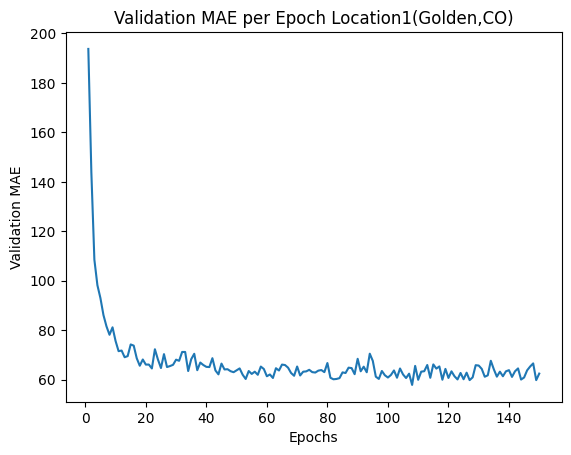

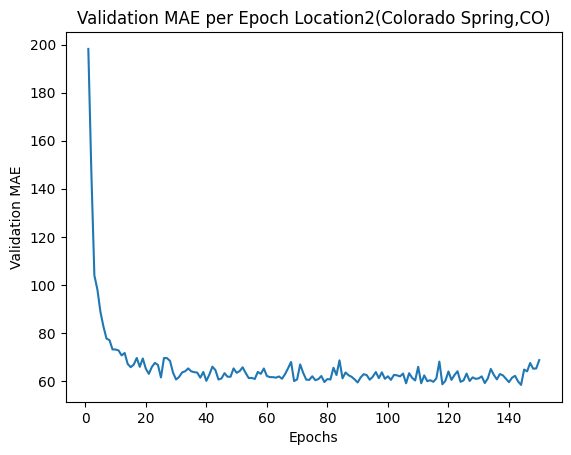

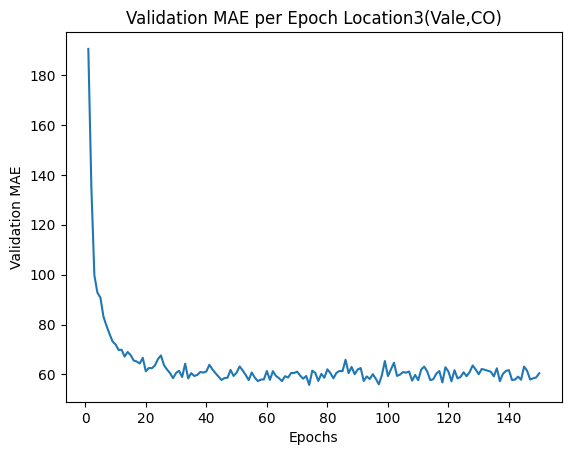

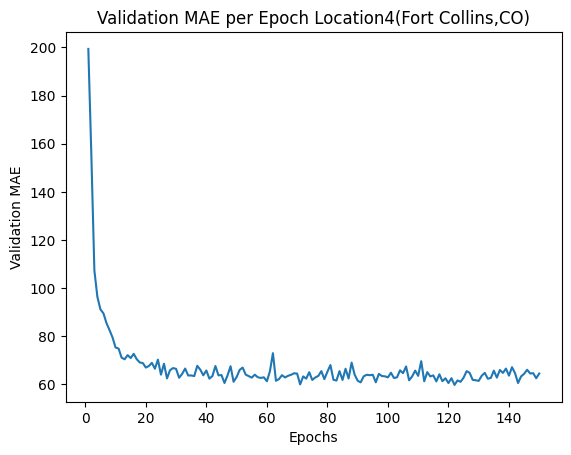

In [26]:
for i in range(locs):
    plt.clf()
    plt.plot(range(1, len(average_mae_history_lst[i]) + 1), average_mae_history_lst[i])
    plt.title('Validation MAE per Epoch {}'.format(text[i]))
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

In [27]:
best_model_lst = []
for i in range(locs):
    model_reloaded = load_model(checkpoint_no_lst[i] + '/' + model_name_lst[i])
    
    # Saving the best model in the correct path and format
    root_directory = os.getcwd()
    checkpoint_dir = os.path.join(root_directory, checkpoint_no_lst[i])
    model_name_temp = os.path.join(checkpoint_dir, model_name_lst[i] + '.h5')
    model_reloaded.save(model_name_temp)
    
    # Deletion of the automatically created folder under Model Checkpoint File.
    folder_name_temp = os.path.join(checkpoint_dir, model_name_lst[i])
    shutil.rmtree(folder_name_temp, ignore_errors=True)
    best_model = load_model(model_name_temp)
    best_model_lst.append(best_model)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.s

In [28]:
test_loss_lst = []
test_mae_lst = []
for i in range(locs):
    test_loss, test_mae = best_model_lst[i].evaluate(testX_scaled_lst[i], testY_lst[i], steps=n_test_steps)
    test_loss_lst.append(test_loss)
    test_mae_lst.append(test_mae)
    print()
    print('Test MAE {}:'.format(text[i]), test_mae)

17/17 [==============================] - 0s 500us/step - loss: 14445.8408 - mae: 61.8138

Test MAE Location1(Golden,CO): 61.813819885253906
17/17 [==============================] - 0s 517us/step - loss: 14831.5029 - mae: 61.6217

Test MAE Location2(Colorado Spring,CO): 61.621734619140625
17/17 [==============================] - 0s 480us/step - loss: 14962.3428 - mae: 60.5045

Test MAE Location3(Vale,CO): 60.504486083984375
17/17 [==============================] - 0s 492us/step - loss: 12198.0156 - mae: 56.1435

Test MAE Location4(Fort Collins,CO): 56.14348602294922


In [29]:
y_pred_ann_lst = []
for i in range(locs):
    y_pred = best_model_lst[i].predict(testX_scaled_lst[i])
    y_pred_ann_lst.append(y_pred)
    
y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 298us/step


array([[ 16.853662 ],
       [  1.4787064],
       [989.586    ],
       [ -7.75333  ],
       [777.3607   ]], dtype=float32)

In [30]:
df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    df_results_lst.append(df_results)

df_results_lst[0]

,Actual,Predicted
0,0.0,16.853662
1,0.0,1.478706
2,967.0,989.585999
3,0.0,-7.753330
4,878.0,777.360718
...,...,...
3498,0.0,5.567139
3499,0.0,-10.031675
3500,854.0,866.691895
3501,0.0,-2.677936


In [31]:
for i in range(locs):
    print("Neural Network for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i], squared=False))
    print("=================================================================")
    
    print("Linear Regression for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=================================================================")
    
    print("SVR for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=================================================================\n")
    

Neural Network for Location1(Golden,CO)
Mean Absolute Error: 61.81382154936437
Mean Squared Error: 14445.841708066231
Root Mean Squared Error: 120.1908553429346
Linear Regression for Location1(Golden,CO)
Mean Absolute Error: 73.34473329470414
Mean Squared Error: 16084.807167683895
Root Mean Squared Error: 126.82589312787786
SVR for Location1(Golden,CO)
Mean Absolute Error: 137.0725072531945
Mean Squared Error: 63612.95696838486
Root Mean Squared Error: 252.2160918109407

Neural Network for Location2(Colorado Spring,CO)
Mean Absolute Error: 61.621738279015545
Mean Squared Error: 14831.504702563847
Root Mean Squared Error: 121.78466530135823
Linear Regression for Location2(Colorado Spring,CO)
Mean Absolute Error: 72.14272926896014
Mean Squared Error: 16585.825650263017
Root Mean Squared Error: 128.78596837490883
SVR for Location2(Colorado Spring,CO)
Mean Absolute Error: 139.30089271162822
Mean Squared Error: 66120.81064504826
Root Mean Squared Error: 257.1396714726226

Neural Network for

In [32]:
# make the time stamp matches the test Y
test_size = testY_lst[0].shape[0]
shifted_df = dfs[0].iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


In [33]:
#get the best day!
k = 22
day_long = 38
for i in range(locs):
    day1 = y_pred_ann_lst[i][:k]
    print(day1)
    err =[]
    err.append(metrics.mean_absolute_error(testY_lst[i][:k], y_pred_ann_lst[i][:k]))
    for j in range(k, y_pred.shape[0], day_long):
        err.append(metrics.mean_absolute_error(testY[j:j+day_long], y_pred[j:j+day_long]))
    
    print("min error ", min(err))
    print("position of best day ", err.index(min(err)))
    day_ind = day_long * (err.index(min(err))) + 15
    print(day_ind)


[[ 16.853662 ]
 [  1.4787064]
 [989.586    ]
 [ -7.75333  ]
 [777.3607   ]
 [ -8.774687 ]
 [ 88.82003  ]
 [631.4771   ]
 [-23.043324 ]
 [ 11.135841 ]
 [253.8929   ]
 [862.69336  ]
 [-24.773682 ]
 [ -6.6652393]
 [764.9645   ]
 [369.3789   ]
 [576.4458   ]
 [ -7.9711514]
 [ 48.549934 ]
 [921.5654   ]
 [ 11.3213215]
 [721.3013   ]]
min error  33.374615132808685
position of best day  7
281
[[ 8.1108543e+01]
 [ 8.3255963e+02]
 [ 2.7746433e-01]
 [ 9.1020441e+02]
 [ 6.7174554e+02]
 [ 9.5662097e+02]
 [ 1.2507481e+01]
 [-8.3278198e+00]
 [-1.0704216e+01]
 [ 5.5860938e+02]
 [ 3.3904416e+02]
 [ 7.9400067e+02]
 [ 1.7708397e+01]
 [-6.2260299e+00]
 [-1.2254890e+01]
 [ 1.3500123e+00]
 [-4.0613551e+00]
 [ 2.5806665e+02]
 [ 3.3807251e+01]
 [-6.3810077e+00]
 [ 6.8562091e+02]
 [-3.9504342e+00]]
min error  33.374615132808685
position of best day  7
281
[[-15.155531 ]
 [ -3.0131927]
 [ -2.1527076]
 [ 25.455824 ]
 [-15.608566 ]
 [-13.7515545]
 [ -7.2664504]
 [ 24.656084 ]
 [237.85541  ]
 [ -5.1586385]
 [490.

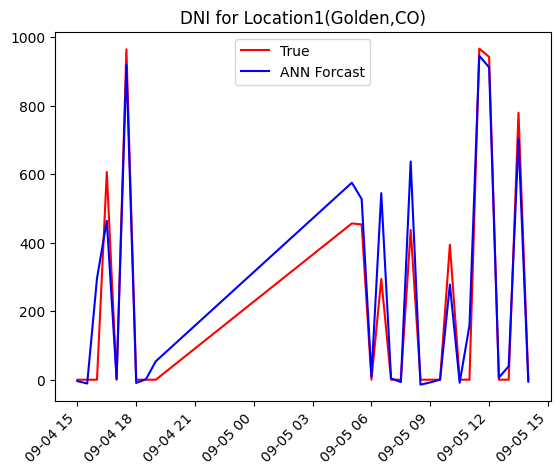

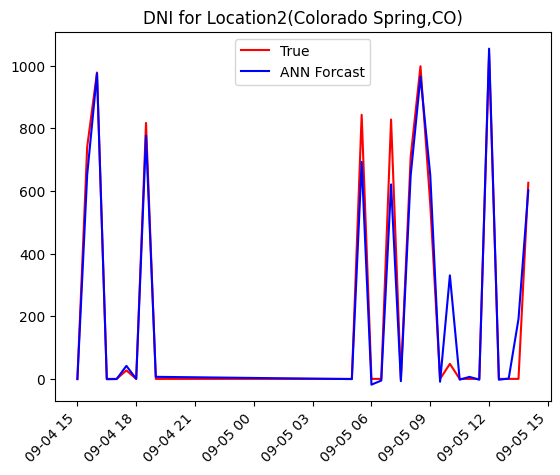

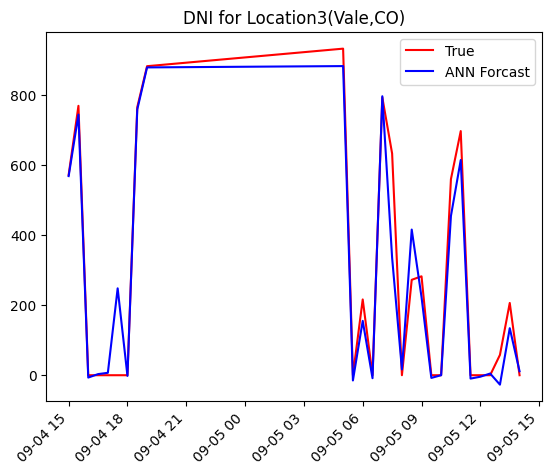

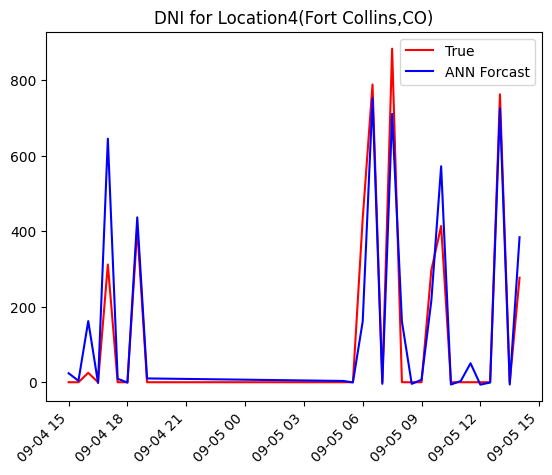

In [34]:
for i in range(locs):
    plt.clf()
    plt.title('DNI for {}'.format(text[i]))
    plt.plot(timest[72:72+28], testY_lst[i][72:72+28], 'r', label='True')
    plt.plot(timest[72:72+28], y_pred_ann_lst[i][72:72+28], 'b', label='ANN Forcast')
    # plt.plot(timest[82:82+38], y_pred_svr_lst[i][82:82+38], 'y', label='SVR Forcast')
    # plt.plot(timest[82:82+38], y_pred_linreg_lst[i][82:82+38], 'g', label='LinearReg Forcast')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

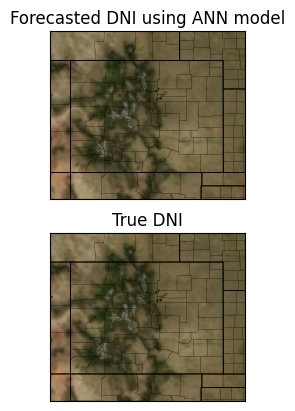

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# fig = plt.figure() 
fig, axes = plt.subplots(2, 1)
axes[0].set_title("Forecasted DNI using ANN model")
m1 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[0])

m1.bluemarble()
m1.drawstates()
m1.drawcounties()

axes[1].set_title("True DNI")
m2 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[1])

m2.bluemarble()
m2.drawstates()
m2.drawcounties()


# m.plot(x,y, 'bo', markersize=5)

plt.show()

In [36]:
# Moving results to another file
import pickle
for i in range(locs):
    y_trans_ann_lst = list(np.reshape(y_pred_ann_lst[i],y_pred_ann_lst[i].shape[0]))
    y_trans_true_lst = list(np.reshape(testY_lst[i], testY_lst[0].shape[0]))
    
    with open("pred_nn{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_ann_lst, fp)

    with open("true_y{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_true_lst, fp)

In [37]:
################# Skip this cell, it worked better in a sperete file ####################
# import matplotlib.animation as animation 
# from matplotlib.animation import PillowWriter

# point = m.plot(x, y, 'ro', markersize=5)[0]

# def init(): 
#     point.set_markersize(0)
#     return point,

# # animation function.  This is called sequentially
# def animate(i):
#     s = 0.05 * i
#     # point.set_linewidth(s)
#     # m = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon, resolution = 'h', area_thresh = 0.1, llcrnrlon=-110, llcrnrlat=36, urcrnrlon=-101, urcrnrlat=42)
#     point.set_markersize(s)
#     return point, 
#     # m.bluemarble()
#     # m.drawstates()
#     # m.drawcounties()
    
#     # x,y = m(p1_lon, p1_lat)
#     # m.plot(x, y, 'yo', markersize=s)

# anim = animation.FuncAnimation(plt.gcf(), animate, init_func = init, frames = y_pred_list, interval = 20, blit = True)
# # writer = PillowWriter(fps=30)
# # anim.save("myMap.gif", writer=writer)

# # plt.tight_layout()
# plt.show()
# # anim.save('animatedMap.mp4', writer = 'sa', fps = 30)